In [1858]:
import pandas as pd
import numpy as np

In [1859]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1860]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [1861]:
import plotly.express as px

In [1862]:
wine = pd.read_csv('winequalityN.csv')

In [1863]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

## Primero verificamos si el dataset contiene valores nulos

In [1864]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## En este caso decidi reemplazar los valores nulos de los datos numericos continuos por el mean en base al tipo de vino

In [1865]:
wine.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [1866]:
columns_to_use=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [1867]:
wine_limpio  = pd.DataFrame()
for type_ in wine.loc[ : , "type" ].drop_duplicates():
    wine_type = wine.loc[ wine['type'] == type_ , : ].copy()
    for c_ in columns_to_use: 
        mean_column = np.mean( wine_type.loc[ : , c_ ] )
        wine_type.loc[ np.isnan( wine_type[c_] ) , c_ ] = mean_column
        
    wine_limpio = pd.concat([ wine_limpio.copy() , wine_type.copy() ])    

## Vamos Analizar el mean de cada tipo de vino para descubrir que relacion tienen cada uno

In [1868]:
wine_red= wine_limpio.loc[wine_limpio['type']=='red',:]

In [1869]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.322104,0.527738,0.271145,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.739677,0.179029,0.194683,1.409928,0.047065,10.460157,32.895324,0.001887,0.154193,0.169488,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [1870]:
wine_white= wine_limpio.loc[wine_limpio['type']=='white',:]

In [1871]:
wine_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.00000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.33425,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909
std,0.843118,0.100739,0.12096,5.071239,0.021845,17.007137,42.498065,0.002991,0.150906,0.114123,1.230621,0.885639
min,3.800000,0.080000,0.00000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.27000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.32000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.39000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.66000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Según lo que pude observar observo lo siguiente:
### 1. El vino blanco tiene ciertas diferencias que el vino rojo como ser el citric acid, residual sugar, chlorides... etc
### 2. Puedo concluir que el vino blanco es más acido que el rojo, pero el vino rojo tiene una mayor azucar residual
### 3. El dióxido de sulfuro es menor en el vino rojo que en el vino blanco

In [1872]:
wine_limpio.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [1873]:
wine_limpio['alcohol'].value_counts()*100/wine_limpio.shape[0]

9.500000     5.648761
9.400000     5.110051
9.200000     4.171156
10.000000    3.524704
10.500000    3.493920
               ...   
10.533333    0.015392
11.366667    0.015392
12.333333    0.015392
14.050000    0.015392
10.750000    0.015392
Name: alcohol, Length: 111, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x229c1e5ee50>,
 'caps': [<matplotlib.lines.Line2D at 0x229c1e70430>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c1e5eb80>],
 'medians': [<matplotlib.lines.Line2D at 0x229c1e709d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c1e70ca0>],
 'means': []}

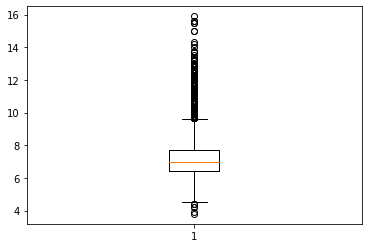

In [1874]:
plt.boxplot( wine_limpio["fixed acidity"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x229c1ec4cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x229c1ed32b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c1ec4b20>],
 'medians': [<matplotlib.lines.Line2D at 0x229c1ed3850>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c1ed3b20>],
 'means': []}

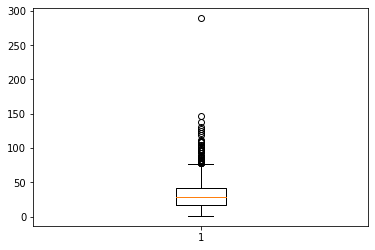

In [1875]:
plt.boxplot( wine_limpio["free sulfur dioxide"] )

### Para este caso segun el analisis anterior existen valores atipicos en el dataset por lo que tocara limpiar las variables numericas continunas, decidi omitir las varibles alcohol, PH y density ya que ambos vinos poseen valores muy similares y un mean bastante similar asi que no generara muchos valores atipicos

{'whiskers': [<matplotlib.lines.Line2D at 0x229c3038be0>,
 'caps': [<matplotlib.lines.Line2D at 0x229c30461c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c3038a30>],
 'medians': [<matplotlib.lines.Line2D at 0x229c3046760>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c3046a30>],
 'means': []}

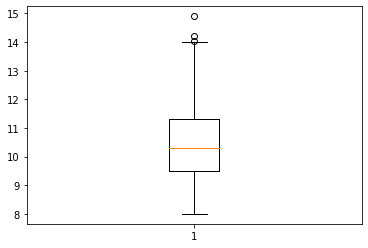

In [1876]:
plt.boxplot( wine_limpio["alcohol"] )

{'whiskers': [<matplotlib.lines.Line2D at 0x229c30a61f0>,
 'caps': [<matplotlib.lines.Line2D at 0x229c30a6790>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c308ad30>],
 'medians': [<matplotlib.lines.Line2D at 0x229c30a6d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c30b3040>],
 'means': []}

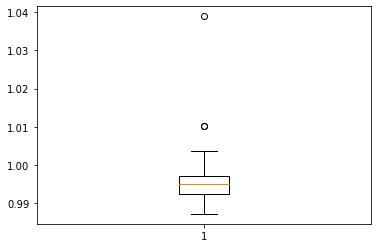

In [1877]:
plt.boxplot( wine_limpio["density"] )

## Aqui realizare un analisis por estratificacion de tipo de vino y otro por calidad y tipo de vino para ver cual me genera la menor cantidad de valores atipicos

## Analizaremos valores atipicos de ambos tipos de vino

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

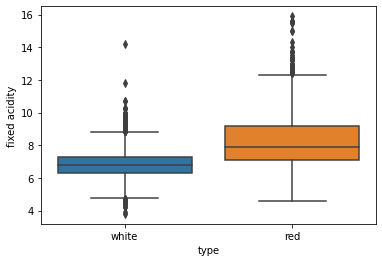

In [1878]:
sns.boxplot( data=wine_limpio , x="type" , y="fixed acidity" )

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

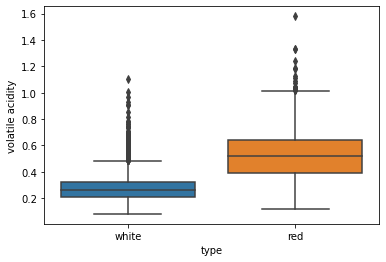

In [1879]:
sns.boxplot( data=wine_limpio , x="type" , y="volatile acidity" )

<AxesSubplot:xlabel='type', ylabel='citric acid'>

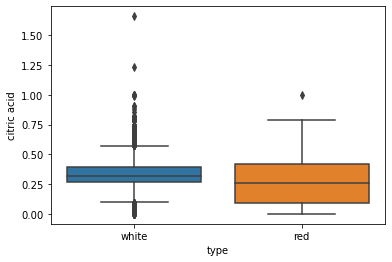

In [1880]:
sns.boxplot( data=wine_limpio , x="type" , y="citric acid" )

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

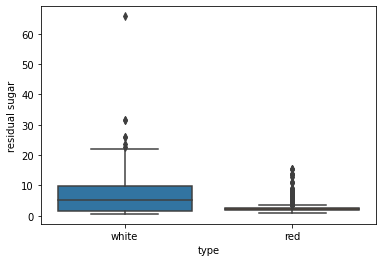

In [1881]:
sns.boxplot( data=wine_limpio , x="type" , y="residual sugar" )

<AxesSubplot:xlabel='type', ylabel='chlorides'>

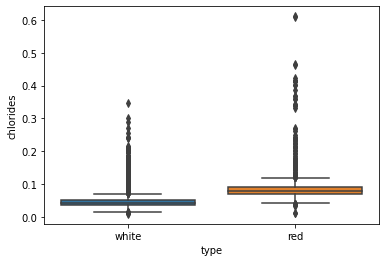

In [1882]:
sns.boxplot( data=wine_limpio , x="type" , y="chlorides" )

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

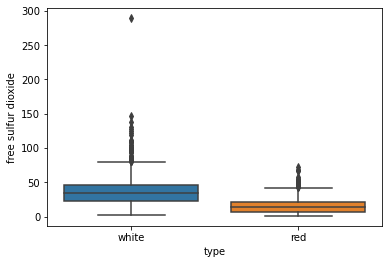

In [1883]:
sns.boxplot( data=wine_limpio , x="type" , y="free sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

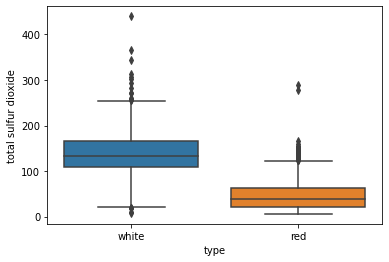

In [1884]:
sns.boxplot( data=wine_limpio , x="type" , y="total sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='sulphates'>

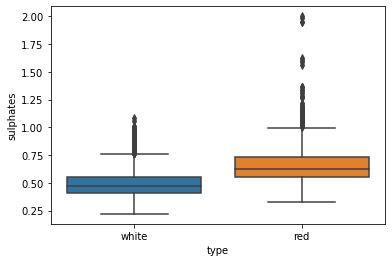

In [1885]:
sns.boxplot( data=wine_limpio , x="type" , y="sulphates" )

## Limpieza Fixed acidity

## Analisis de estratificacion por tipo de vino

In [1886]:
dfq1=wine_limpio.loc[:,["type","fixed acidity"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","fixed acidity_q1"]

In [1887]:
dfq3=wine_limpio.loc[:,["type","fixed acidity"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","fixed acidity_q3"]

In [1888]:
dfqmean=wine_limpio.loc[:,["type","fixed acidity"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","fixed acidity_mean"]

In [1889]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1890]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["fixed acidity_q3"] - r["fixed acidity_q1"] , axis = 1)

In [1891]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["fixed acidity_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["fixed acidity_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1892]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1893]:
def get_real_avg(r):
    if (r["fixed acidity"]<r["lower_bound"]) | (r["fixed acidity"]>r["upper_bound"]):
        return r["fixed acidity_mean"]
    else:
        return r["fixed acidity"]

In [1894]:
wine_limpio["new_fixed acidity"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

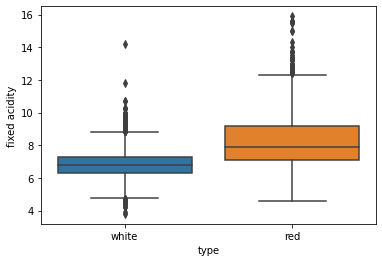

In [1895]:
sns.boxplot( data=wine_limpio , x="type" , y="fixed acidity" )

<AxesSubplot:xlabel='type', ylabel='new_fixed acidity'>

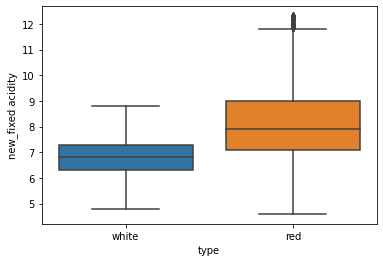

In [1896]:
sns.boxplot( data=wine_limpio , x="type" , y="new_fixed acidity" )

{'whiskers': [<matplotlib.lines.Line2D at 0x229c453f1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x229c453f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c4531ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x229c453fd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c454e040>],
 'means': []}

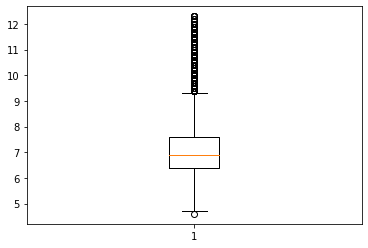

In [1897]:
plt.boxplot( wine_limpio["new_fixed acidity"] )

# Analisis de estratificacion por tipo y calidad

In [1898]:
dfq1=wine_limpio.loc[:,["type",'quality',"fixed acidity"]].groupby(["type",'quality'],as_index=False).quantile(0.25)
dfq1.columns=["type",'quality',"fixed acidity_q1"]

In [1899]:
dfq3=wine_limpio.loc[:,["type",'quality',"fixed acidity"]].groupby(["type",'quality'],as_index=False).quantile(0.75)
dfq3.columns=["type",'quality',"fixed acidity_q3"]

In [1900]:
dfqmean=wine_limpio.loc[:,["type",'quality',"fixed acidity"]].groupby(["type",'quality'],as_index=False).mean()
dfqmean.columns=["type",'quality',"fixed acidity_mean"]

In [1901]:
df_iqr=dfq1.merge(dfq3,on=["type",'quality'],how="inner").merge(dfqmean,on=["type",'quality'],how="inner")

In [1902]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["fixed acidity_q3"] - r["fixed acidity_q1"] , axis = 1)

In [1903]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["fixed acidity_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["fixed acidity_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1904]:
df_t = wine_limpio.merge( df_iqr , on=["type",'quality'] , how="left" ).copy()

In [1905]:
def get_real_avg(r):
    if (r["fixed acidity"]<r["lower_bound"]) | (r["fixed acidity"]>r["upper_bound"]):
        return r["fixed acidity_mean"]
    else:
        return r["fixed acidity"]

In [1906]:
wine_limpio["new_fixed acidity"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

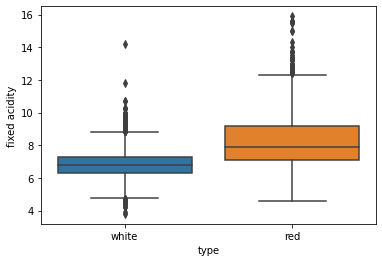

In [1907]:
sns.boxplot( data=wine_limpio , x="type" , y="fixed acidity" )

<AxesSubplot:xlabel='type', ylabel='new_fixed acidity'>

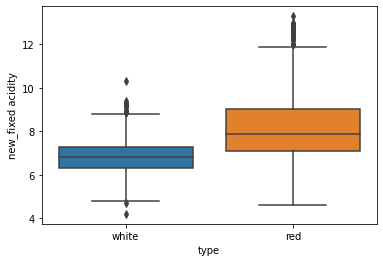

In [1908]:
sns.boxplot( data=wine_limpio , x="type" , y="new_fixed acidity" )

{'whiskers': [<matplotlib.lines.Line2D at 0x229c4602be0>,
 'caps': [<matplotlib.lines.Line2D at 0x229c46121c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229c4602910>],
 'medians': [<matplotlib.lines.Line2D at 0x229c4612760>],
 'fliers': [<matplotlib.lines.Line2D at 0x229c4612a30>],
 'means': []}

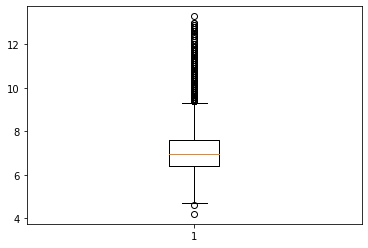

In [1909]:
plt.boxplot( wine_limpio["new_fixed acidity"] )

## Podemos concluir que al estratificar solo por el tipo de vino obtenemos mejores resultados y menos valores atipicos a diferencia de estratificar con tipo y calidad

## Limpieza volatile acidity

In [1910]:
dfq1=wine_limpio.loc[:,["type","volatile acidity"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","volatile acidity_q1"]

In [1911]:
dfq3=wine_limpio.loc[:,["type","volatile acidity"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","volatile acidity_q3"]

In [1912]:
dfqmean=wine_limpio.loc[:,["type","volatile acidity"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","volatile acidity_mean"]

In [1913]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1914]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["volatile acidity_q3"] - r["volatile acidity_q1"] , axis = 1)

In [1915]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["volatile acidity_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["volatile acidity_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1916]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1917]:
def get_real_avg(r):
    if (r["volatile acidity"]<r["lower_bound"]) | (r["volatile acidity"]>r["upper_bound"]):
        return r["volatile acidity_mean"]
    else:
        return r["volatile acidity"]

In [1918]:
wine_limpio["new_volatile acidity"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

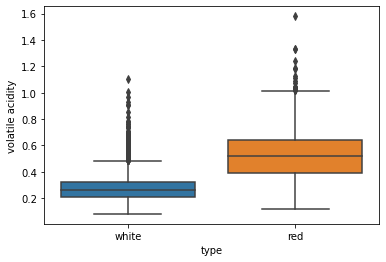

In [1919]:
sns.boxplot( data=wine_limpio , x="type" , y="volatile acidity" )

<AxesSubplot:xlabel='type', ylabel='new_volatile acidity'>

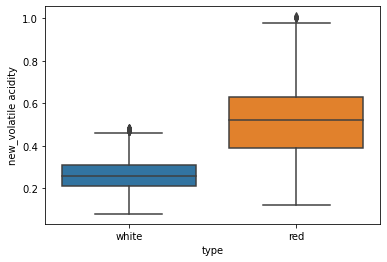

In [1920]:
sns.boxplot( data=wine_limpio , x="type" , y="new_volatile acidity" )

## Limpieza Citric acid

In [1921]:
dfq1=wine_limpio.loc[:,["type","citric acid"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","citric acid_q1"]

In [1922]:
dfq3=wine_limpio.loc[:,["type","citric acid"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","citric acid_q3"]

In [1923]:
dfqmean=wine_limpio.loc[:,["type","citric acid"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","citric acid_mean"]

In [1924]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1925]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["citric acid_q3"] - r["citric acid_q1"] , axis = 1)

In [1926]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["citric acid_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["citric acid_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1927]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1928]:
def get_real_avg(r):
    if (r["citric acid"]<r["lower_bound"]) | (r["citric acid"]>r["upper_bound"]):
        return r["citric acid_mean"]
    else:
        return r["citric acid"]

In [1929]:
wine_limpio["new_citric acid"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='citric acid'>

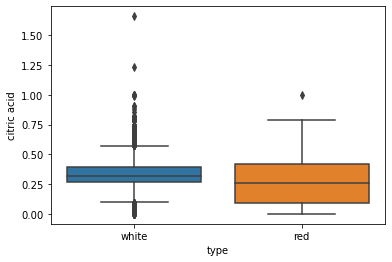

In [1930]:
sns.boxplot( data=wine_limpio , x="type" , y="citric acid" )

<AxesSubplot:xlabel='type', ylabel='new_citric acid'>

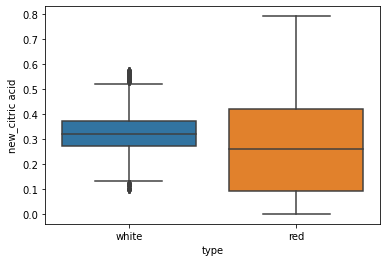

In [1931]:
sns.boxplot( data=wine_limpio , x="type" , y="new_citric acid" )

## Limpieza residual Sugar

In [1932]:
dfq1=wine_limpio.loc[:,["type","residual sugar"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","residual sugar_q1"]

In [1933]:
dfq3=wine_limpio.loc[:,["type","residual sugar"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","residual sugar_q3"]

In [1934]:
dfqmean=wine_limpio.loc[:,["type","residual sugar"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","residual sugar_mean"]

In [1935]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1936]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["residual sugar_q3"] - r["residual sugar_q1"] , axis = 1)

In [1937]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["residual sugar_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["residual sugar_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1938]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1939]:
def get_real_avg(r):
    if (r["residual sugar"]<r["lower_bound"]) | (r["residual sugar"]>r["upper_bound"]):
        return r["residual sugar_mean"]
    else:
        return r["residual sugar"]

In [1940]:
wine_limpio["new_residual sugar"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

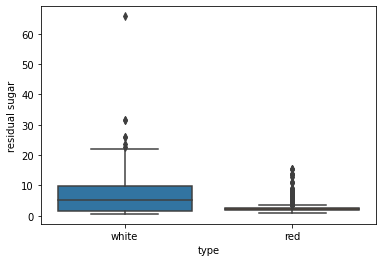

In [1941]:
sns.boxplot( data=wine_limpio , x="type" , y="residual sugar" )

<AxesSubplot:xlabel='type', ylabel='new_residual sugar'>

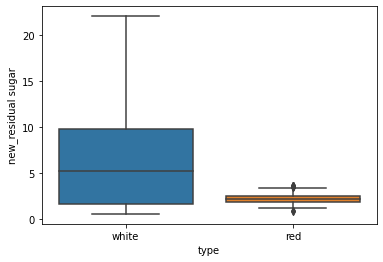

In [1942]:
sns.boxplot( data=wine_limpio , x="type" , y="new_residual sugar" )

## Limpieza Chlorides

In [1943]:
dfq1=wine_limpio.loc[:,["type","chlorides"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","chlorides_q1"]

In [1944]:
dfq3=wine_limpio.loc[:,["type","chlorides"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","chlorides_q3"]

In [1945]:
dfqmean=wine_limpio.loc[:,["type","chlorides"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","chlorides_mean"]

In [1946]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1947]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["chlorides_q3"] - r["chlorides_q1"] , axis = 1)

In [1948]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["chlorides_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["chlorides_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1949]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1950]:
def get_real_avg(r):
    if (r["chlorides"]<r["lower_bound"]) | (r["chlorides"]>r["upper_bound"]):
        return r["chlorides_mean"]
    else:
        return r["chlorides"]

In [1951]:
wine_limpio["new_chlorides"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='chlorides'>

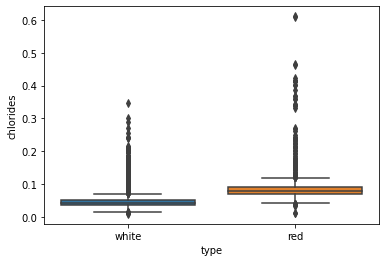

In [1952]:
sns.boxplot( data=wine_limpio , x="type" , y="chlorides" )

<AxesSubplot:xlabel='type', ylabel='new_chlorides'>

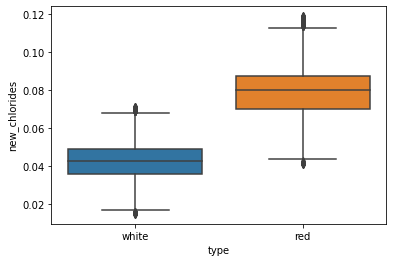

In [1953]:
sns.boxplot( data=wine_limpio , x="type" , y="new_chlorides" )

## Limpieza free sulfur dioxide

In [1954]:
dfq1=wine_limpio.loc[:,["type","free sulfur dioxide"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","free sulfur dioxide_q1"]

In [1955]:
dfq3=wine_limpio.loc[:,["type","free sulfur dioxide"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","free sulfur dioxide_q3"]

In [1956]:
dfqmean=wine_limpio.loc[:,["type","free sulfur dioxide"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","free sulfur dioxide_mean"]

In [1957]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1958]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["free sulfur dioxide_q3"] - r["free sulfur dioxide_q1"] , axis = 1)

In [1959]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["free sulfur dioxide_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["free sulfur dioxide_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1960]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1961]:
def get_real_avg(r):
    if (r["free sulfur dioxide"]<r["lower_bound"]) | (r["free sulfur dioxide"]>r["upper_bound"]):
        return r["free sulfur dioxide_mean"]
    else:
        return r["free sulfur dioxide"]

In [1962]:
wine_limpio["new_free sulfur dioxide"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

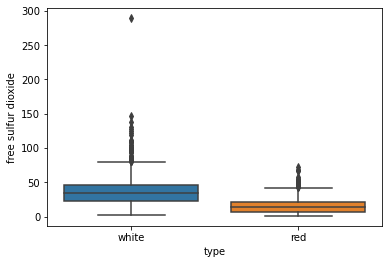

In [1963]:
sns.boxplot( data=wine_limpio , x="type" , y="free sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='new_free sulfur dioxide'>

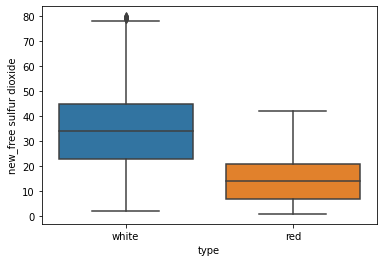

In [1964]:
sns.boxplot( data=wine_limpio , x="type" , y="new_free sulfur dioxide" )

## Limpieza total sulfur dioxide

In [1965]:
dfq1=wine_limpio.loc[:,["type","total sulfur dioxide"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","total sulfur dioxide_q1"]

In [1966]:
dfq3=wine_limpio.loc[:,["type","total sulfur dioxide"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","total sulfur dioxide_q3"]

In [1967]:
dfqmean=wine_limpio.loc[:,["type","total sulfur dioxide"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","total sulfur dioxide_mean"]

In [1968]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1969]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["total sulfur dioxide_q3"] - r["total sulfur dioxide_q1"] , axis = 1)

In [1970]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["total sulfur dioxide_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["total sulfur dioxide_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1971]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1972]:
def get_real_avg(r):
    if (r["total sulfur dioxide"]<r["lower_bound"]) | (r["total sulfur dioxide"]>r["upper_bound"]):
        return r["total sulfur dioxide_mean"]
    else:
        return r["total sulfur dioxide"]

In [1973]:
wine_limpio["new_total sulfur dioxide"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

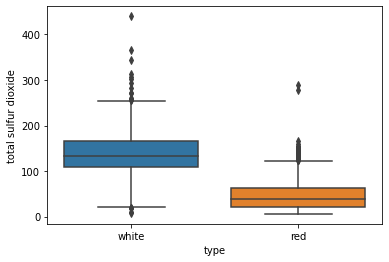

In [1974]:
sns.boxplot( data=wine_limpio , x="type" , y="total sulfur dioxide" )

<AxesSubplot:xlabel='type', ylabel='new_total sulfur dioxide'>

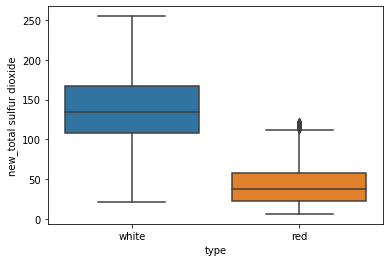

In [1975]:
sns.boxplot( data=wine_limpio , x="type" , y="new_total sulfur dioxide" )

## Limpieza sulphates

In [1976]:
dfq1=wine_limpio.loc[:,["type","sulphates"]].groupby(["type"],as_index=False).quantile(0.25)
dfq1.columns=["type","sulphates_q1"]

In [1977]:
dfq3=wine_limpio.loc[:,["type","sulphates"]].groupby(["type"],as_index=False).quantile(0.75)
dfq3.columns=["type","sulphates_q3"]

In [1978]:
dfqmean=wine_limpio.loc[:,["type","sulphates"]].groupby(["type"],as_index=False).mean()
dfqmean.columns=["type","sulphates_mean"]

In [1979]:
df_iqr=dfq1.merge(dfq3,on=["type"],how="inner").merge(dfqmean,on=["type"],how="inner")

In [1980]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["sulphates_q3"] - r["sulphates_q1"] , axis = 1)

In [1981]:
df_iqr["upper_bound"] = df_iqr.apply( lambda r:  r["sulphates_q3"] + (1.5*r["iqr"] ) , axis = 1)
df_iqr["lower_bound"] = df_iqr.apply( lambda r:  r["sulphates_q1"] - (1.5*r["iqr"] ) , axis = 1)

In [1982]:
df_t = wine_limpio.merge( df_iqr , on=["type"] , how="left" ).copy()

In [1983]:
def get_real_avg(r):
    if (r["sulphates"]<r["lower_bound"]) | (r["sulphates"]>r["upper_bound"]):
        return r["sulphates_mean"]
    else:
        return r["sulphates"]

In [1984]:
wine_limpio["new_sulphates"]=df_t.apply( lambda r: get_real_avg(r) , axis = 1 )

<AxesSubplot:xlabel='type', ylabel='sulphates'>

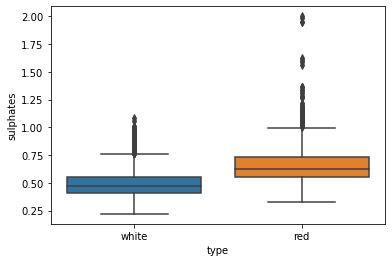

In [1985]:
sns.boxplot( data=wine_limpio , x="type" , y="sulphates" )

<AxesSubplot:xlabel='type', ylabel='new_sulphates'>

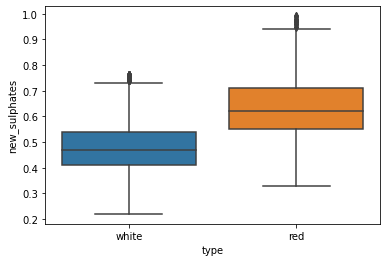

In [1986]:
sns.boxplot( data=wine_limpio , x="type" , y="new_sulphates" )

## En esta parte ya se limpiaron las variables numericas continuas que fueron estratificadas por el tipo de vino

## Arreglamos el Dataset limpio y lo guardamos en un .csv

In [1987]:
wine_limpio.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'new_fixed acidity', 'new_volatile acidity',
       'new_citric acid', 'new_residual sugar', 'new_chlorides',
       'new_free sulfur dioxide', 'new_total sulfur dioxide', 'new_sulphates'],
      dtype='object')

In [1988]:
wine_limpio=wine_limpio.loc[:,['type','new_fixed acidity', 'new_volatile acidity',
       'new_citric acid', 'new_residual sugar', 'new_chlorides',
       'new_free sulfur dioxide', 'new_total sulfur dioxide', 'density', 'pH', 'new_sulphates', 'alcohol',
       'quality']]

In [1989]:
wine_limpio.to_csv('wine_limpio.csv')

## PCA

In [1990]:
wine_limpio

,type,new_fixed acidity,new_volatile acidity,new_citric acid,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,density,pH,new_sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.658078,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [1991]:
wine_limpio.describe()

,new_fixed acidity,new_volatile acidity,new_citric acid,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,density,pH,new_sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.155883,0.328865,0.312037,5.336756,0.051592,29.855649,114.662780,0.994697,3.218391,0.519368,10.491801,5.818378
std,1.166577,0.152135,0.124371,4.655421,0.019363,16.366023,55.982608,0.002999,0.160648,0.123618,1.192712,0.873255
min,4.200000,0.080000,0.000000,0.600000,0.015000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,76.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,6.935568,0.280000,0.310000,2.800000,0.046000,29.000000,117.000000,0.994890,3.210000,0.500000,10.300000,6.000000
75%,7.600000,0.390000,0.380000,8.000000,0.060000,41.000000,155.000000,0.996990,3.320000,0.590000,11.300000,6.000000
max,13.300000,1.010000,0.790000,22.000000,0.119000,80.000000,255.000000,1.038980,4.010000,0.990000,14.900000,9.000000


In [1992]:
wine_white1 =  wine_limpio.loc[ wine_limpio['type']=='white' ,:].copy()

In [1993]:
wine_red1 =  wine_limpio.loc[ wine_limpio['type']=='red' ,:].copy()

In [1994]:
wine_limpio1 =  wine_limpio.loc[ : , ['new_fixed acidity', 'new_volatile acidity', 'new_citric acid',
       'new_residual sugar', 'new_chlorides', 'new_free sulfur dioxide',
       'new_total sulfur dioxide', 'density', 'pH', 'new_sulphates', 'alcohol'] ].copy()

In [1995]:
x = wine_limpio1["new_residual sugar"] 
y = wine_limpio1["alcohol"]

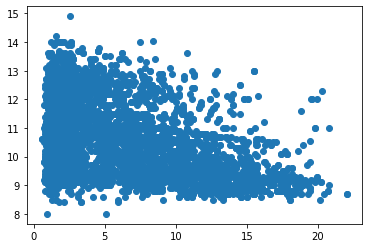

In [1996]:
plt.scatter( x , y )

## según el grafico anterior podemos ver que el alcohol se ve afectado por el residual sugar, a mayor residual sugar menor alcohol, por lo que es una correlación negativa

In [1997]:
c = wine_limpio1.corr()

In [1998]:
c

,new_fixed acidity,new_volatile acidity,new_citric acid,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,density,pH,new_sulphates,alcohol
new_fixed acidity,1.000000,0.264139,0.304883,-0.130536,0.497720,-0.295119,-0.351473,0.450485,-0.208983,0.341726,-0.096550
new_volatile acidity,0.264139,1.000000,-0.399719,-0.248032,0.614507,-0.389303,-0.483500,0.288230,0.270797,0.303684,-0.045081
new_citric acid,0.304883,-0.399719,1.000000,0.092700,-0.113988,0.125838,0.167276,0.054477,-0.321371,0.026866,0.033583
new_residual sugar,-0.130536,-0.248032,0.092700,1.000000,-0.205487,0.452967,0.526821,0.499276,-0.277192,-0.222092,-0.367522
new_chlorides,0.497720,0.614507,-0.113988,-0.205487,1.000000,-0.363611,-0.489212,0.548959,0.224218,0.464454,-0.288261
new_free sulfur dioxide,-0.295119,-0.389303,0.125838,0.452967,-0.363611,1.000000,0.728485,0.019120,-0.163387,-0.245786,-0.182431
new_total sulfur dioxide,-0.351473,-0.483500,0.167276,0.526821,-0.489212,0.728485,1.000000,0.018124,-0.239808,-0.333973,-0.258299
density,0.450485,0.288230,0.054477,0.499276,0.548959,0.019120,0.018124,1.000000,0.011988,0.290638,-0.686745
pH,-0.208983,0.270797,-0.321371,-0.277192,0.224218,-0.163387,-0.239808,0.011988,1.000000,0.256926,0.121016
new_sulphates,0.341726,0.303684,0.026866,-0.222092,0.464454,-0.245786,-0.333973,0.290638,0.256926,1.000000,-0.005825


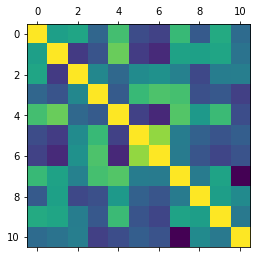

In [1999]:
plt.matshow(c)

C:\Users\dqnie\AppData\Local\Temp\ipykernel_2692\1104028275.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(c, mask=np.zeros_like(c, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

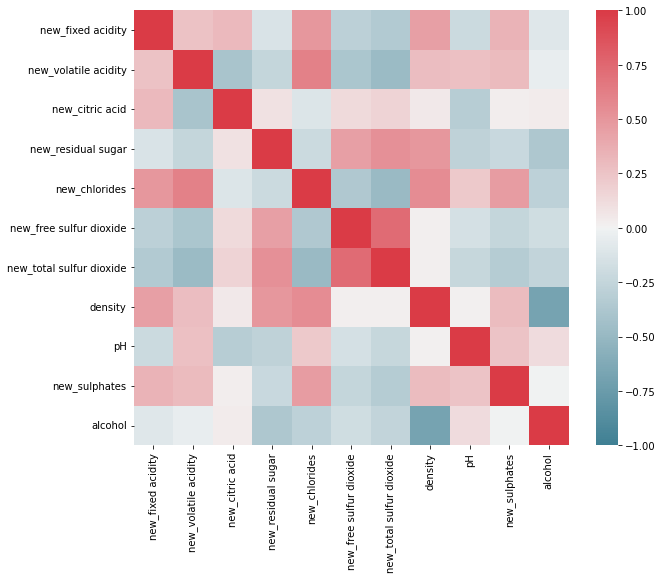

In [2000]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(c, mask=np.zeros_like(c, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin = -1 , vmax= 1 )

### Principal component Analysis (PCA) - implementacion

### Para este caso realizaremos 2 analisis uno incluyendo todos los tipos de vino y en el otro estratificaremos por tipo de vino para ver que concluciones podemos sacar

## Analisis por estratificacion de tipo de vino PCA (2 entrenaminetos 1 para white y red)

In [2001]:
cols_to_use = ['new_volatile acidity', 'new_residual sugar', 'pH', 'density', 'alcohol']

In [2002]:
wine_nred =  wine_limpio.loc[ wine_limpio['type']=='red' , cols_to_use].copy()

In [2003]:
wine_nwhite =  wine_limpio.loc[ wine_limpio['type']=='white' , cols_to_use ].copy()

In [2004]:
x = wine_nred.loc[ : , cols_to_use ].values

In [2005]:
y = wine_nwhite.loc[ : , cols_to_use ].values

In [2006]:
x

array([[ 0.7    ,  1.9    ,  3.51   ,  0.9978 ,  9.4    ],
       [ 0.88   ,  2.6    ,  3.2    ,  0.9968 ,  9.8    ],
       [ 0.76   ,  2.3    ,  3.26   ,  0.997  ,  9.8    ],
       ...,
       [ 0.51   ,  2.3    ,  3.42   ,  0.99574, 11.     ],
       [ 0.645  ,  2.     ,  3.57   ,  0.99547, 10.2    ],
       [ 0.31   ,  3.6    ,  3.39   ,  0.99549, 11.     ]])

In [2007]:
y

array([[ 0.27      , 20.7       ,  3.        ,  1.001     ,  8.8       ],
       [ 0.3       ,  1.6       ,  3.3       ,  0.994     ,  9.5       ],
       [ 0.28      ,  6.9       ,  3.26      ,  0.9951    , 10.1       ],
       ...,
       [ 0.27825189,  1.2       ,  2.99      ,  0.99254   ,  9.4       ],
       [ 0.29      ,  1.1       ,  3.34      ,  0.98869   , 12.8       ],
       [ 0.21      ,  0.8       ,  3.26      ,  0.98941   , 11.8       ]])

In [2008]:
x = StandardScaler().fit_transform(x)

In [2009]:
y = StandardScaler().fit_transform(y)

In [2010]:
pca = PCA( n_components=2 )

In [2011]:
principalComponents_red = pca.fit_transform(x)

In [2012]:
principalComponents_white = pca.fit_transform(y)

In [2013]:
pcadf1 = pd.DataFrame(data=principalComponents_red ,columns=['c1','c2']) 

In [2014]:
pcadf2 = pd.DataFrame(data=principalComponents_white ,columns=['c1','c2']) 

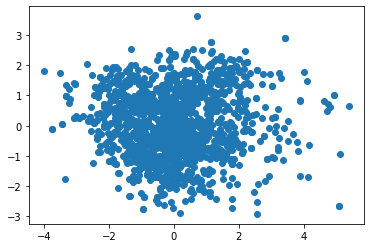

In [2015]:
plt.scatter( pcadf1['c1'] , pcadf1['c2'] )

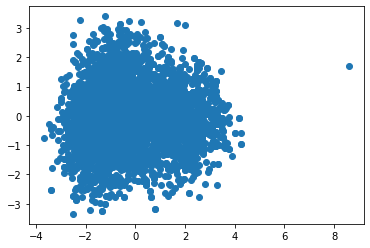

In [2016]:
plt.scatter( pcadf2['c1'] , pcadf2['c2'] )

In [2017]:
km_red = KMeans( n_clusters=3  ).fit(pcadf1)

In [2018]:
km_white = KMeans( n_clusters=3  ).fit(pcadf2)

In [2019]:
km_red.cluster_centers_

array([[ 1.57136884,  0.76072526],
       [-0.04156591, -0.90600175],
       [-1.25983066,  0.71613982]])

In [2020]:
km_white.cluster_centers_

array([[-1.3494097 , -0.81659168],
       [ 1.70357699, -0.16910398],
       [-0.63167527,  0.89406841]])

In [2021]:
cetroids = km_red.cluster_centers_

In [2022]:
cetroids = km_white.cluster_centers_

In [2023]:
km_red.labels_

array([1, 1, 1, ..., 0, 1, 2])

In [2024]:
km_white.labels_

array([1, 2, 2, ..., 0, 0, 2])

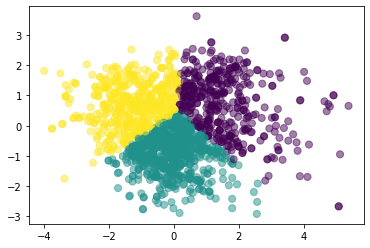

In [2025]:
plt.scatter( pcadf1['c1'] , pcadf1['c2'] , c=km_red.labels_.astype(float) , s=50, alpha=0.5 )

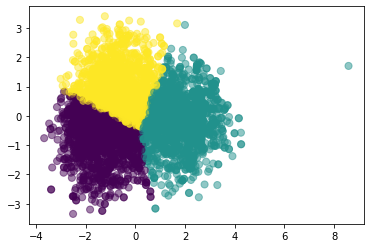

In [2026]:
plt.scatter( pcadf2['c1'] , pcadf2['c2'] , c=km_white.labels_.astype(float) , s=50, alpha=0.5 )

In [2027]:
wine_white1['cluster'] = km_white.labels_

In [2028]:
wine_white1

,type,new_fixed acidity,new_volatile acidity,new_citric acid,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,density,pH,new_sulphates,alcohol,quality,cluster
0,white,7.0,0.270000,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,white,6.3,0.300000,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,white,8.1,0.280000,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,white,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,white,7.2,0.230000,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.210000,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,white,6.6,0.320000,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,white,6.5,0.278252,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,white,5.5,0.290000,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2029]:
wine_red1['cluster'] = km_red.labels_

In [2030]:
wine_red1

,type,new_fixed acidity,new_volatile acidity,new_citric acid,new_residual sugar,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,density,pH,new_sulphates,alcohol,quality,cluster
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,5,1
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680000,9.8,5,1
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650000,9.8,5,1
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580000,9.8,6,2
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.658078,11.2,6,0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,1


In [2031]:
wine_k = pd.concat([wine_white1, wine_red1])

In [2032]:
wine_k1= wine_k.loc[:,['new_volatile acidity','new_residual sugar', 'pH', 'density','alcohol', 'cluster']]

In [2033]:
wine_k1

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
0,0.270,20.7,3.00,1.00100,8.8,1
1,0.300,1.6,3.30,0.99400,9.5,2
2,0.280,6.9,3.26,0.99510,10.1,2
3,0.230,8.5,3.19,0.99560,9.9,1
4,0.230,8.5,3.19,0.99560,9.9,1
...,...,...,...,...,...,...
6492,0.600,2.0,3.45,0.99490,10.5,1
6493,0.550,2.2,3.52,0.99512,11.2,0
6494,0.510,2.3,3.42,0.99574,11.0,0
6495,0.645,2.0,3.57,0.99547,10.2,1


In [2034]:
wine_k1.loc[ wine_k1['cluster'] == 0 , : ].describe()

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
count,1861.000000,1861.000000,1861.000000,1861.000000,1861.000000,1861.0
mean,0.335784,3.180848,3.200692,0.992100,11.694043,0.0
std,0.095673,2.411543,0.166339,0.002094,1.022158,0.0
min,0.120000,0.600000,2.740000,0.987110,8.800000,0.0
25%,0.278252,1.600000,3.080000,0.990480,11.000000,0.0
50%,0.320000,2.200000,3.190000,0.991800,11.800000,0.0
75%,0.380000,4.200000,3.300000,0.993580,12.500000,0.0
max,0.850000,15.500000,4.010000,0.997690,14.900000,0.0


In [2035]:
wine_k1.loc[ wine_k1['cluster'] == 1 , : ].describe()

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
count,2488.00000,2488.000000,2488.000000,2488.000000,2488.000000,2488.0
mean,0.37912,8.703796,3.202607,0.997002,9.602572,1.0
std,0.18511,5.331241,0.162220,0.001802,0.650146,0.0
min,0.10500,1.200000,2.720000,0.993380,8.000000,1.0
25%,0.25000,2.538806,3.090000,0.995800,9.100000,1.0
50%,0.31000,8.800000,3.180000,0.996860,9.500000,1.0
75%,0.49000,13.000000,3.310000,0.998000,9.900000,1.0
max,1.01000,22.000000,3.690000,1.038980,12.700000,1.0


In [2036]:
wine_k1.loc[ wine_k1['cluster'] == 2 , : ].describe()

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.0
mean,0.264661,3.304610,3.252009,0.994276,10.480175,2.0
std,0.123751,2.512951,0.148126,0.002732,0.860267,0.0
min,0.080000,0.700000,2.740000,0.988860,8.000000,2.0
25%,0.180000,1.500000,3.150000,0.992300,9.800000,2.0
50%,0.230000,2.300000,3.240000,0.993700,10.400000,2.0
75%,0.290000,4.600000,3.340000,0.995803,11.000000,2.0
max,0.900000,14.500000,3.820000,1.003690,13.700000,2.0


## Analisis sin estratificacion de tipo de vino (1 entrenamiento)

In [2037]:
cols_to_use = ['new_volatile acidity', 'new_residual sugar', 'pH', 'density', 'alcohol']

In [2038]:
wine_n =  wine_limpio.loc[ : , cols_to_use ].copy()

In [2039]:
x = wine_n.loc[ : , cols_to_use ].values

In [2040]:
x = StandardScaler().fit_transform(x)

In [2041]:
pca = PCA( n_components=2 )

In [2042]:
principalComponents = pca.fit_transform(x)

In [2043]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

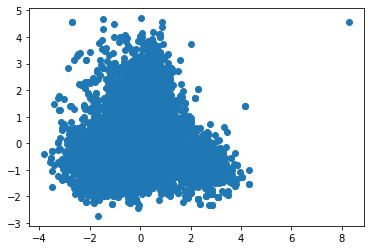

In [2044]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

In [2045]:
km = KMeans( n_clusters=3  ).fit(pcadf)

In [2046]:
km.cluster_centers_

array([[ 1.48599567, -0.5245171 ],
       [ 0.09030115,  1.86716819],
       [-1.20297791, -0.5145989 ]])

In [2047]:
cetroids = km.cluster_centers_

In [2048]:
km.labels_

array([0, 2, 0, ..., 1, 1, 1])

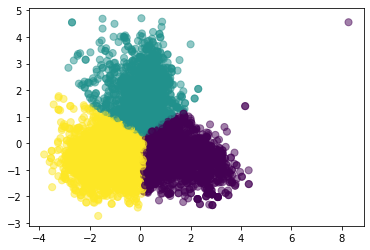

In [2049]:
plt.scatter( pcadf['c1'] , pcadf['c2'] , c=km.labels_.astype(float) , s=50, alpha=0.5 )

In [2050]:
wine_n['cluster'] = km.labels_

In [2051]:
wine_n

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
0,0.270,20.7,3.00,1.00100,8.8,0
1,0.300,1.6,3.30,0.99400,9.5,2
2,0.280,6.9,3.26,0.99510,10.1,0
3,0.230,8.5,3.19,0.99560,9.9,0
4,0.230,8.5,3.19,0.99560,9.9,0
...,...,...,...,...,...,...
6492,0.600,2.0,3.45,0.99490,10.5,1
6493,0.550,2.2,3.52,0.99512,11.2,1
6494,0.510,2.3,3.42,0.99574,11.0,1
6495,0.645,2.0,3.57,0.99547,10.2,1


In [2052]:
wine_n.loc[ wine_n['cluster'] == 0 , : ].describe()

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.0
mean,0.273980,10.162313,3.145030,0.996837,9.572804,0.0
std,0.075419,4.452479,0.128133,0.002080,0.649947,0.0
min,0.105000,0.950000,2.720000,0.993000,8.000000,0.0
25%,0.220000,7.100000,3.060000,0.995400,9.100000,0.0
50%,0.270000,10.200000,3.140000,0.996700,9.400000,0.0
75%,0.320000,13.400000,3.220000,0.998200,9.900000,0.0
max,0.540000,22.000000,3.660000,1.038980,12.300000,0.0


In [2053]:
wine_n.loc[ wine_n['cluster'] == 1 , : ].describe()

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
count,1412.000000,1412.000000,1412.000000,1412.000000,1412.000000,1412.0
mean,0.543221,2.433011,3.352862,0.996677,10.209289,1.0
std,0.160694,1.219453,0.150024,0.001775,0.880477,0.0
min,0.110000,0.800000,2.870000,0.990820,8.400000,1.0
25%,0.430000,1.900000,3.260000,0.995600,9.500000,1.0
50%,0.540000,2.200000,3.350000,0.996600,10.000000,1.0
75%,0.645000,2.538806,3.440000,0.997680,10.800000,1.0
max,1.010000,14.500000,4.010000,1.003690,13.400000,1.0


In [2054]:
wine_n.loc[ wine_n['cluster'] == 2 , : ].describe()

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.0
mean,0.265738,3.018703,3.209053,0.992056,11.345612,2.0
std,0.079971,2.331925,0.146809,0.001742,1.046371,0.0
min,0.080000,0.600000,2.740000,0.987110,8.800000,2.0
25%,0.200000,1.400000,3.110000,0.990800,10.600000,2.0
50%,0.260000,2.000000,3.210000,0.992000,11.300000,2.0
75%,0.320000,4.200000,3.300000,0.993200,12.200000,2.0
max,0.600000,15.500000,3.760000,0.998000,14.900000,2.0


## Conclusiones

Según los análisis de ambos casos tomaría un solo entrenamiento y no dividiría el dataset (2 entrenamientos) por tipo de vino (rojo y blanco) ya que al analizar los clúster si dividimos por el tipo de vino podemos notar ciertas inconsistencias como por ejemplo si se agrupa cada tipo de vino con sus respectivas caracteristicas y luego unimos el resultado podemos notar que en el cluster 0 de vinos rojos no tienen mucha relacion con el cluster 0 de vinos blancos

Mientras que en el análisis sin estratificar podemos notar que la agrupación en cada clúster hace mucho sentido, por ejemplo:
-Clúster 0 tiene una mayor azúcar residual y por lo tanto menor cantidad de alcohol, lo que significa que es un vino suave
-Clúster 1 tiene cantidad de alcohol moderado y son los vinos más ácidos
-Clúster 2 tiene un nivel de azúcar y acidez normal, pero son los vinos con mayor nivel de alcohol

También hay que tomar en cuenta que si un usuario compra un vino dulce se le recomendara del clúster 0 y aquí puede contener tanto vinos rojos o blancos con características similares, esa elección del tipo de vino pues es más dirigida al cliente ya que el vino rojo y blanco pues se consumen en diferentes ocasiones entonces el cliente elegirá el vino que más le convenga según la ocasión

In [2055]:
wine_n

,new_volatile acidity,new_residual sugar,pH,density,alcohol,cluster
0,0.270,20.7,3.00,1.00100,8.8,0
1,0.300,1.6,3.30,0.99400,9.5,2
2,0.280,6.9,3.26,0.99510,10.1,0
3,0.230,8.5,3.19,0.99560,9.9,0
4,0.230,8.5,3.19,0.99560,9.9,0
...,...,...,...,...,...,...
6492,0.600,2.0,3.45,0.99490,10.5,1
6493,0.550,2.2,3.52,0.99512,11.2,1
6494,0.510,2.3,3.42,0.99574,11.0,1
6495,0.645,2.0,3.57,0.99547,10.2,1


In [2056]:
wine_limpio['cluster'] = km.labels_

## Machine learning supervisado

### Creamos la variable de respuesta

In [2057]:
wine_limpio['Outcome']= wine_limpio.apply( lambda r: 1 if r['quality']>=5 else 0 , axis = 1 )

In [2058]:
wine_limpio.columns

Index(['type', 'new_fixed acidity', 'new_volatile acidity', 'new_citric acid',
       'new_residual sugar', 'new_chlorides', 'new_free sulfur dioxide',
       'new_total sulfur dioxide', 'density', 'pH', 'new_sulphates', 'alcohol',
       'quality', 'cluster', 'Outcome'],
      dtype='object')

In [2059]:
wine_mls=wine_limpio.loc[:, ['new_fixed acidity', 'new_citric acid', 'new_chlorides', 'new_free sulfur dioxide', 'new_total sulfur dioxide', 'new_sulphates', 'cluster','Outcome']].copy()
wine_mls1=wine_limpio.loc[:, ['type','new_fixed acidity', 'new_citric acid', 'new_chlorides', 'new_free sulfur dioxide', 'new_total sulfur dioxide', 'new_sulphates', 'cluster','Outcome']].copy()

### En este caso se haran 2 analisis uno sin la estratificacion (sin la variable type) y otro incluyendo la variable type para ver los resultados que se generan

### Dataset sin la variable Type

In [2060]:
wine_mls

,new_fixed acidity,new_citric acid,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_sulphates,cluster,Outcome
0,7.0,0.36,0.045,45.0,170.0,0.450000,0,1
1,6.3,0.34,0.049,14.0,132.0,0.490000,2,1
2,8.1,0.40,0.050,30.0,97.0,0.440000,0,1
3,7.2,0.32,0.058,47.0,186.0,0.400000,0,1
4,7.2,0.32,0.058,47.0,186.0,0.400000,0,1
...,...,...,...,...,...,...,...,...
6492,6.2,0.08,0.090,32.0,44.0,0.580000,1,1
6493,5.9,0.10,0.062,39.0,51.0,0.658078,1,1
6494,6.3,0.13,0.076,29.0,40.0,0.750000,1,1
6495,5.9,0.12,0.075,32.0,44.0,0.710000,1,1


## Dataset Con la variable type

In [2061]:
wine_mls1

,type,new_fixed acidity,new_citric acid,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_sulphates,cluster,Outcome
0,white,7.0,0.36,0.045,45.0,170.0,0.450000,0,1
1,white,6.3,0.34,0.049,14.0,132.0,0.490000,2,1
2,white,8.1,0.40,0.050,30.0,97.0,0.440000,0,1
3,white,7.2,0.32,0.058,47.0,186.0,0.400000,0,1
4,white,7.2,0.32,0.058,47.0,186.0,0.400000,0,1
...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.08,0.090,32.0,44.0,0.580000,1,1
6493,red,5.9,0.10,0.062,39.0,51.0,0.658078,1,1
6494,red,6.3,0.13,0.076,29.0,40.0,0.750000,1,1
6495,red,5.9,0.12,0.075,32.0,44.0,0.710000,1,1


### Como debemos usar variables numericas entonces debemos crear dummy variables para poder usar la variable type

In [2062]:
from sklearn.preprocessing import LabelBinarizer

In [2063]:
label_binarizer = LabelBinarizer()

In [2064]:
label_binarizer_output = label_binarizer.fit_transform( wine_mls1['type'])

In [2065]:
result_df = pd.DataFrame(label_binarizer_output)

In [2066]:
result_df.columns=['Type']

In [2067]:
wine_mls1 = pd.concat([wine_mls1, result_df], axis=1)

In [2068]:
wine_mls1=wine_mls1.loc[:, ['Type','new_fixed acidity', 'new_citric acid', 'new_chlorides', 'new_free sulfur dioxide', 'new_total sulfur dioxide', 'new_sulphates', 'cluster','Outcome']].copy()

In [2069]:
wine_mls1

,Type,new_fixed acidity,new_citric acid,new_chlorides,new_free sulfur dioxide,new_total sulfur dioxide,new_sulphates,cluster,Outcome
0,1,7.0,0.36,0.045,45.0,170.0,0.450000,0,1
1,1,6.3,0.34,0.049,14.0,132.0,0.490000,2,1
2,1,8.1,0.40,0.050,30.0,97.0,0.440000,0,1
3,1,7.2,0.32,0.058,47.0,186.0,0.400000,0,1
4,1,7.2,0.32,0.058,47.0,186.0,0.400000,0,1
...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.08,0.090,32.0,44.0,0.580000,1,1
6493,0,5.9,0.10,0.062,39.0,51.0,0.658078,1,1
6494,0,6.3,0.13,0.076,29.0,40.0,0.750000,1,1
6495,0,5.9,0.12,0.075,32.0,44.0,0.710000,1,1


## Entrenamiento sin estratificacion de tipos de vino (sin Variable Type)

# Regresion Logistica

In [2142]:
from sklearn.model_selection import train_test_split

In [2143]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [2144]:
features_col = wine_mls.columns.values[0:6]

In [2145]:
X = wine_mls[features_col].values
y = wine_mls["Outcome"].values

In [2146]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.30, random_state=0)

In [2147]:
log_model = LogisticRegression(solver='lbfgs', max_iter=200)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [2148]:
y_pred  = log_model.predict(X_test)

In [2149]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [2150]:
Y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [2151]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

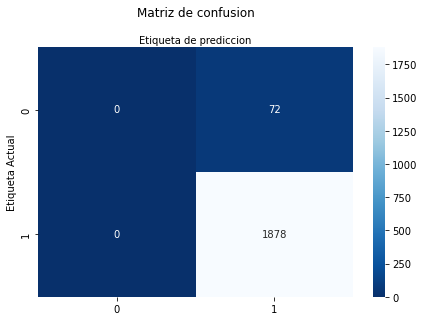

In [2152]:
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [2153]:
print(precision_score(Y_test, y_pred))

0.963076923076923


## Neuronal Network

In [2154]:
from sklearn.neural_network import MLPClassifier

In [2155]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test 

In [2156]:
# Making the Neural Network Classifier
NN = MLPClassifier(random_state=1, max_iter=200)

# Training the model on the training data and labels
NN.fit(x_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(x_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [2157]:
print(precision_score(y_test, y_pred))

0.963076923076923


## Arbol de desiciones

In [2158]:
from sklearn import tree

In [2159]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [2160]:
tree_one = tree_one.fit( x_train , y_train )

In [2161]:
tree_one.tree_.max_depth

19

In [2162]:
y_pred = tree_one.predict(x_test)

In [2163]:
print(precision_score(y_test, y_pred))

0.9698093220338984


## Random Forest

In [2164]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(x_train , y_train);

In [2165]:
y_pred = rf.predict(x_test) >= 0.5

In [2166]:
print(precision_score(y_test, y_pred))

0.9660144181256437


## Entrenamiento por estratificacion de tipos de vino (Variable Type)

## Logistic regresion

In [2167]:
features_col = wine_mls1.columns.values[0:7]

In [2168]:
X = wine_mls1[features_col].values
y = wine_mls1["Outcome"].values

In [2169]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.30, random_state=0)

In [2170]:
log_model = LogisticRegression(solver='lbfgs', max_iter=200)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [2171]:
y_pred  = log_model.predict(X_test)

In [2172]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [2173]:
Y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [2174]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

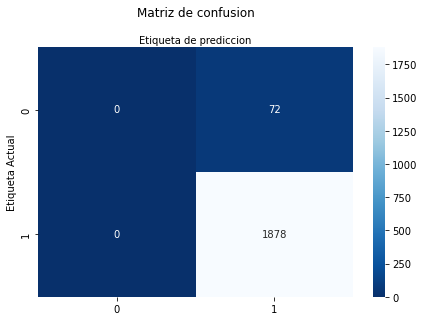

In [2175]:
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [2176]:
print(precision_score(Y_test, y_pred))

0.963076923076923


## Neuronal Network

In [2177]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test 

In [2178]:
# Making the Neural Network Classifier
NN = MLPClassifier(random_state=1, max_iter=200)

# Training the model on the training data and labels
NN.fit(x_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(x_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [2179]:
print(precision_score(y_test, y_pred))

0.963076923076923


## Arbol de desiciones

In [2180]:
tree_one = tree.DecisionTreeClassifier(random_state=1)
tree_one = tree_one.fit( x_train , y_train )

In [2181]:
tree_one.tree_.max_depth

22

In [2182]:
y_pred = tree_one.predict(x_test)

In [2183]:
print(precision_score(y_test, y_pred))

0.9697612732095491


## Random Forest

In [2184]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)
# Train the model on training data
rf.fit(x_train , y_train);

In [2185]:
y_pred = rf.predict(x_test) >= 0.5

In [2186]:
print(precision_score(y_test, y_pred))

0.9660144181256437


## Conclusiones

-Para este análisis decidí tomar la precisión de cada entrenamiento para saber que tan bueno fue prediciendo el outcome 1 (lo positivo)

-Según lo que pude analizar incluir la variable type no altera las predicciones del modelo por lo tanto no era muy necesario incluir esta variable ya que los resultados son
idénticos en ambos entrenamientos.

-Con respecto a los modelos puedo concluir que el modelo que mejor resultados me genero fue el Árbol de Decisiones ya que tiene una precisión de 96.98%

-Tambien decidi reducir la cantidad de iteracciones de cada modelo para evitar un sobreajuste ya que la cantidad de datos era de 6000
